In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
import seaborn as sns
import statsmodels.api as sm
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9

## Итоговое задание

1. Зарегистрироваться на __[Kaggle](https://www.kaggle.com)__
2. Вступить в соревнование __[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)__
3. Скачать данные
4. Обработать
5. Обучить модель
6. Сделать предсказание

Для успешного прохождения необходимо получить значение метрики меньше 0.12645

## Итоговое задание

Первым делом, необходимо обратить внимание на метрику 

$$
L = \sqrt{
    \frac{1}{N} \sum_n (\ln y_n - \ln \tilde{y}_n)^2
}
$$

In [2]:
df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Трансформация признаков

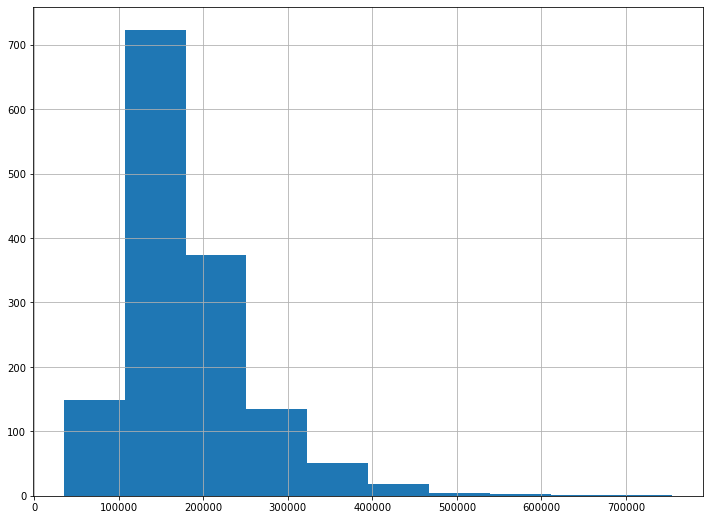

In [3]:
df['SalePrice'].hist();

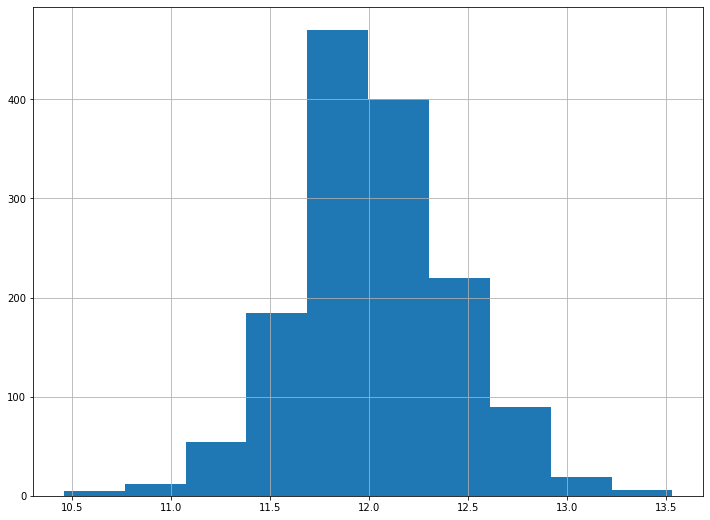

In [4]:
np.log1p(df['SalePrice']).hist();

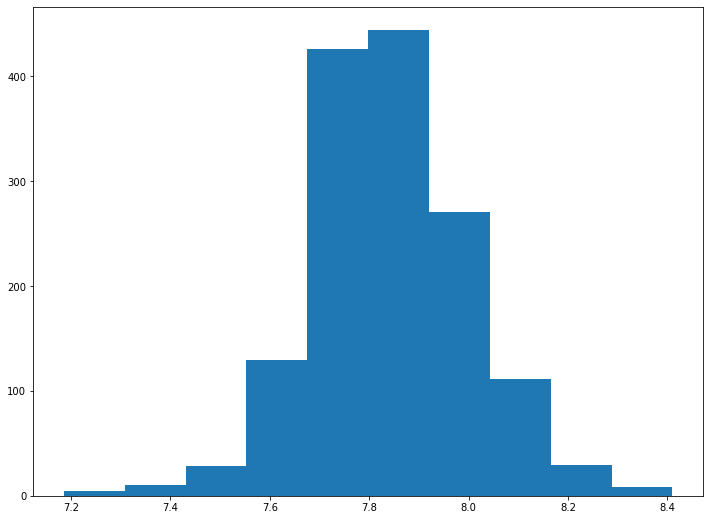

In [5]:
from sklearn.preprocessing import power_transform

tmp = power_transform(df['SalePrice'].values.reshape((-1, 1)), 
                      method='box-cox', standardize=False)
plt.hist(tmp);

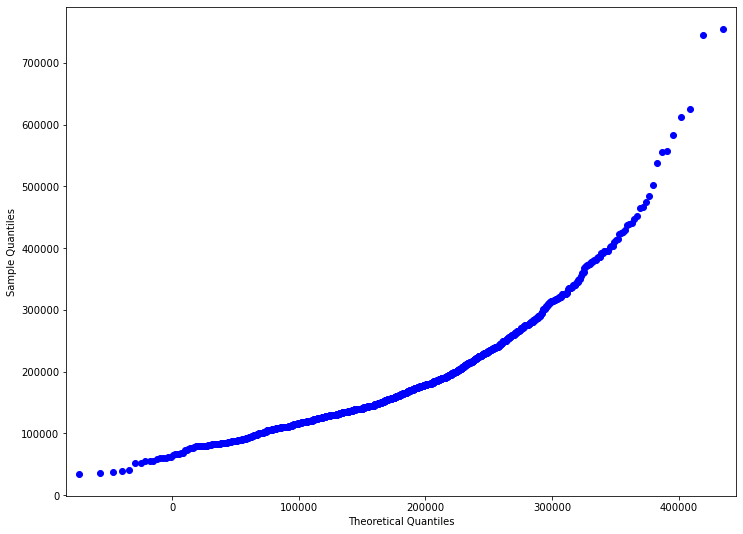

In [6]:
sm.qqplot(df['SalePrice'], 
          loc=df['SalePrice'].mean(), 
          scale=df['SalePrice'].std());

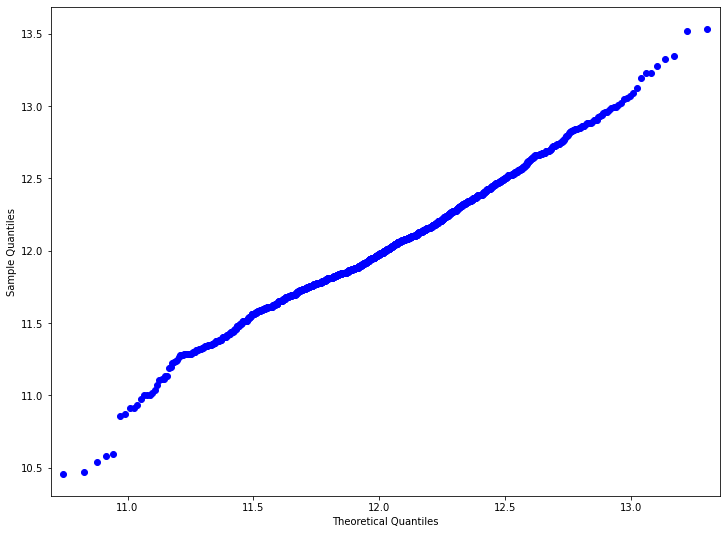

In [7]:
tmp = np.log1p(df['SalePrice'])
sm.qqplot(tmp, loc=tmp.mean(), scale=tmp.std());

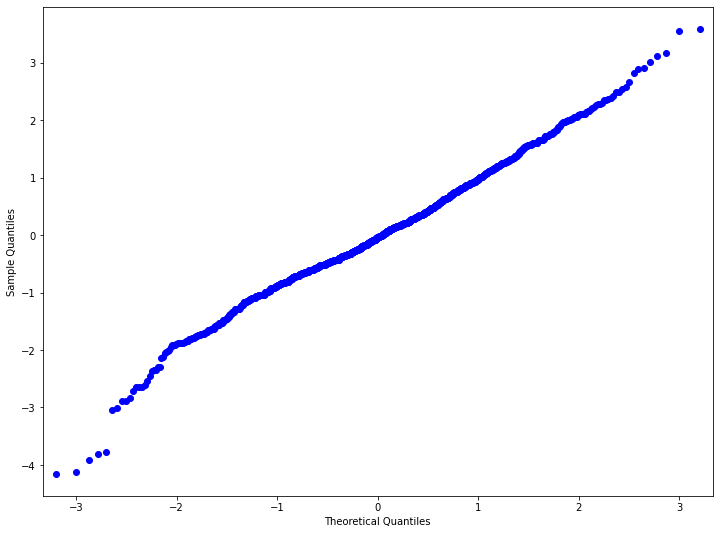

In [8]:
from sklearn.preprocessing import power_transform

tmp = power_transform(df['SalePrice'].values.reshape((-1, 1)), method='box-cox', standardize=True)
sm.qqplot(tmp.ravel(), loc=tmp.mean(), scale=tmp.std());

## Обработка категориальных данных

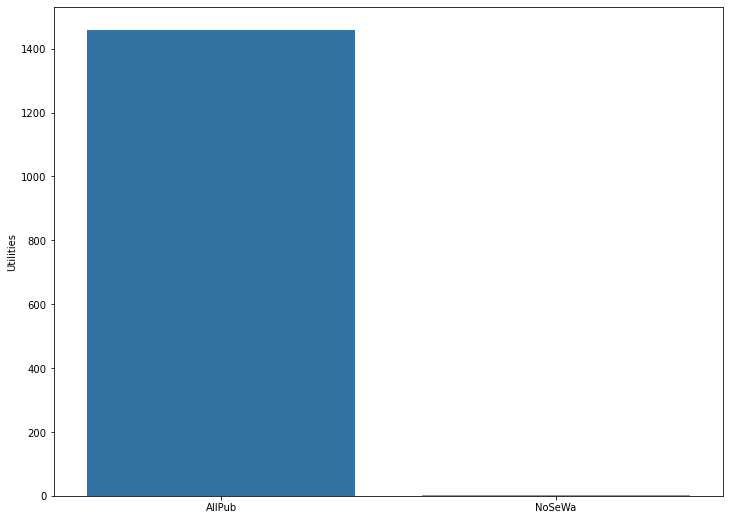

In [9]:
sns.barplot(df['Utilities'].unique(), df['Utilities'].value_counts());

In [10]:
# количество пропусков
df['Fence'].isnull().sum()

1179

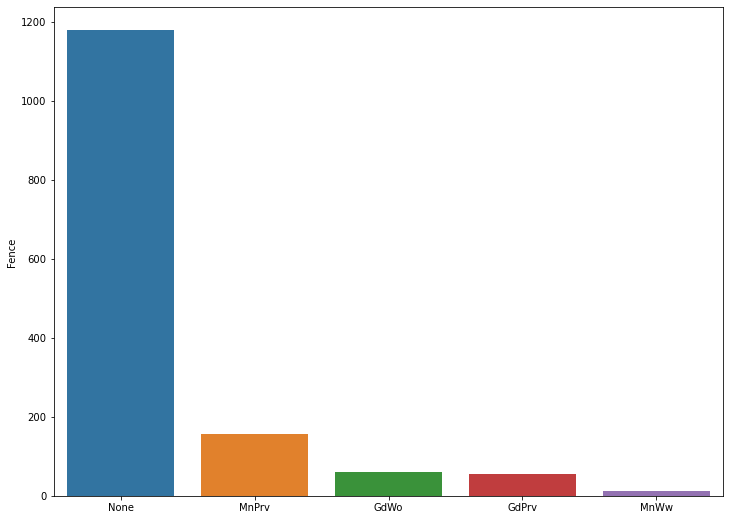

In [11]:
df['Fence'] = df['Fence'].fillna("None")
sns.barplot(df['Fence'].unique(), df['Fence'].value_counts());

## Создание новых признаков

Опыт подсказывает, что полная площадь дома должна хорошо влиять на стоимость.

In [12]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

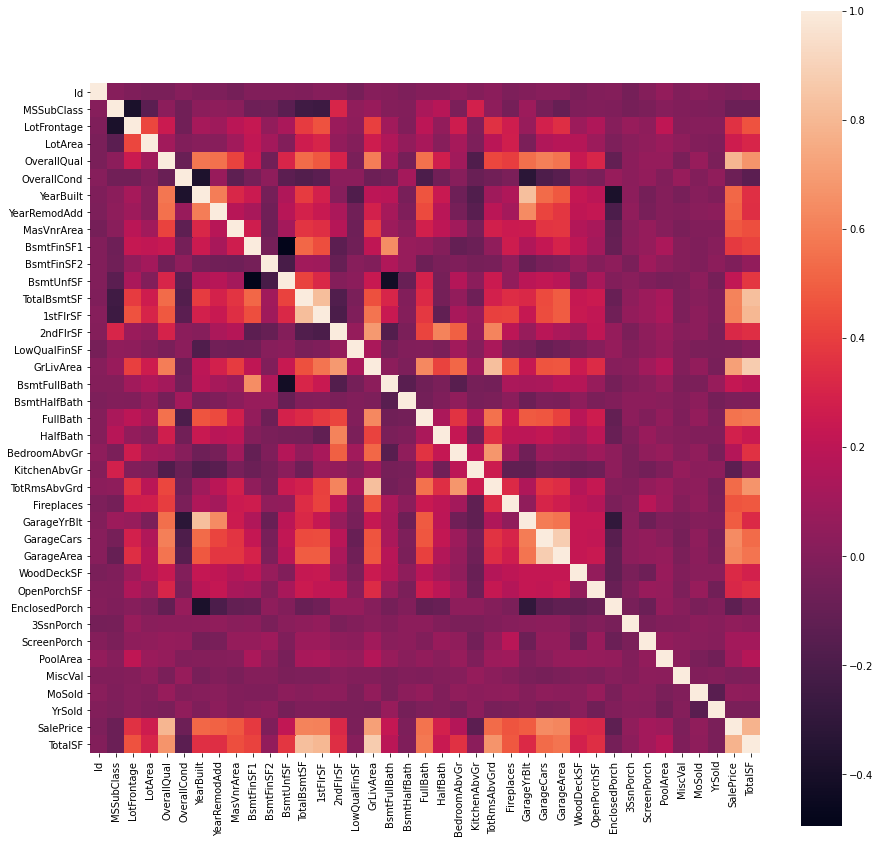

In [13]:
corrmat = df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corrmat, square=True);

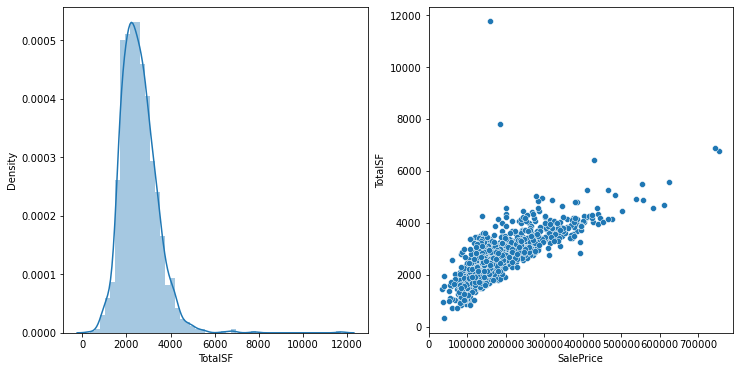

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.distplot(df['TotalSF'])
plt.subplot(122)
sns.scatterplot(df['SalePrice'], df['TotalSF'])
plt.show()

## 1. Подготовка данных под лес
## 2. Случайный лес
## 2. Работа с данными
## 3. Линейка L1
## 4. Пили ансамбль(бэгинг?)

In [15]:
# one-hot кодирование
for any in df.select_dtypes(include=['object']).columns:
    any2 = pd.get_dummies(df[any], dummy_na=True, prefix=any)
    df = pd.concat([df, any2], axis=1)

# удаляем лишнее
for any in df.select_dtypes(include=['object']).columns:
    df = df.drop([any], axis=1)
    
# заменяем Nan на 0
df = df.fillna(0)

In [16]:
# повторяем для test
test = pd.read_csv("test.csv")

# one-hot кодирование
for any in test.select_dtypes(include=['object']).columns:
    any2 = pd.get_dummies(test[any], dummy_na=True, prefix=any)
    test = pd.concat([test, any2], axis=1)

# удаляем лишнее
for any in test.select_dtypes(include=['object']).columns:
    test = test.drop([any], axis=1)
    
# заменяем Nan на 0
test = test.fillna(0)

In [17]:
# добавляем недостающие столбцы в тестовые данные
list_df = list()
list_test = list()

for any in test.columns:
    list_test.append(any)

for any in df.columns:
    list_df.append(any)
    
def Diff(li1, li2):
    return list(set(li1) - set(li2)) + list(set(li2) - set(li1))

dif_list = Diff(list_df, list_test)

for any in dif_list:
    test[any] = 0

In [18]:
# раскидываем данные
# дальше прост сравниваешь test с тем что ты предсказал т.е. с predict
target = df['SalePrice'].values
data = df.drop(['SalePrice'], axis=1).values
test = test.drop(['SalePrice'], axis=1)

# Кушай и расти))
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500).fit(data, target)

predict_rf = rf.predict(test)

predict_rf

array([102202.764, 102472.166, 136994.748, ..., 108839.672, 108539.076,
       149478.776])

In [19]:
answer = pd.read_csv("sample_submission.csv")
answer = answer.drop(['SalePrice'], axis=1)
answer['SalePrice'] = predict_rf

In [20]:
answer.to_csv(r'/home/notInvented/submission.csv', index=False)